In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/octavian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/octavian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/octavian/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
data_real = pd.read_csv('real_reviews_final_clean.csv')

data_real = data_real[data_real['review_text'].apply(lambda x: isinstance(x, str))]
data_real['word_count'] = data_real['review_text'].apply(lambda x: len(x.split()))
data_real.head()

,review_text,label,source,category,word_count
0,Super carte pentru copiii care invata limba en...,real,real reviews from eMAG,uscator de rufe,15
1,Great quick read,real,real reviews from eMAG,blender,3
2,A fost o carte incredibila si nu regret ca am ...,real,real reviews from eMAG,masina de spalat,54
3,Un clasic roman.,real,real reviews from eMAG,laptop,3
4,"Foarte bine scris cartea, este o placere s-o c...",real,real reviews from eMAG,telefon mobil,9


In [3]:
categories = data_real['category'].unique()
categories

array(['uscator de rufe', 'blender', 'masina de spalat', 'laptop',
       'telefon mobil', 'carte', 'televizor', 'husa de telefon',
       'casti audio', 'produs de baie'], dtype=object)

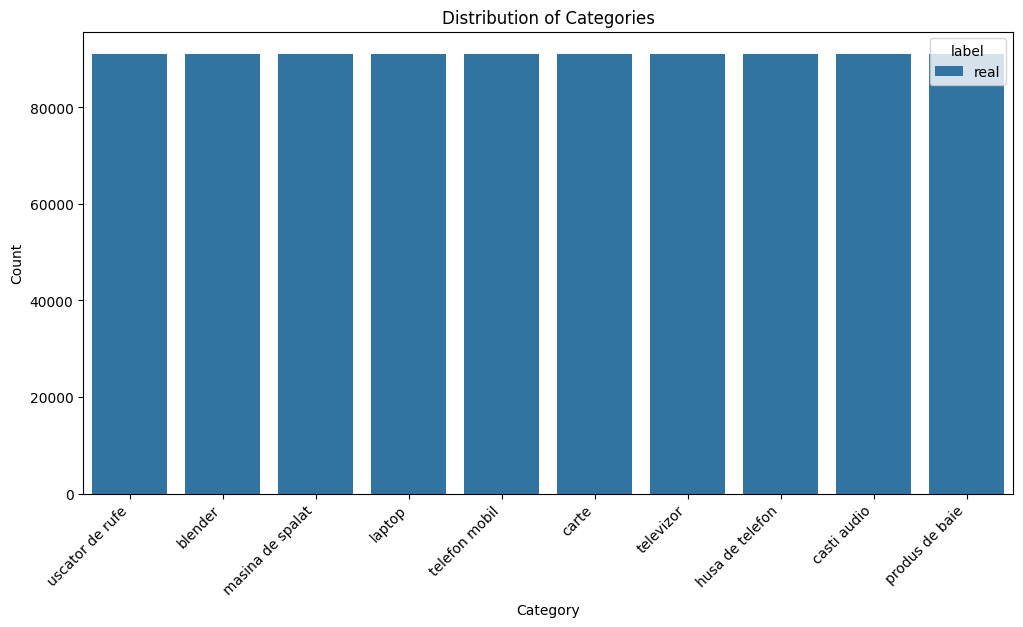

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_real, x='category', hue='label')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

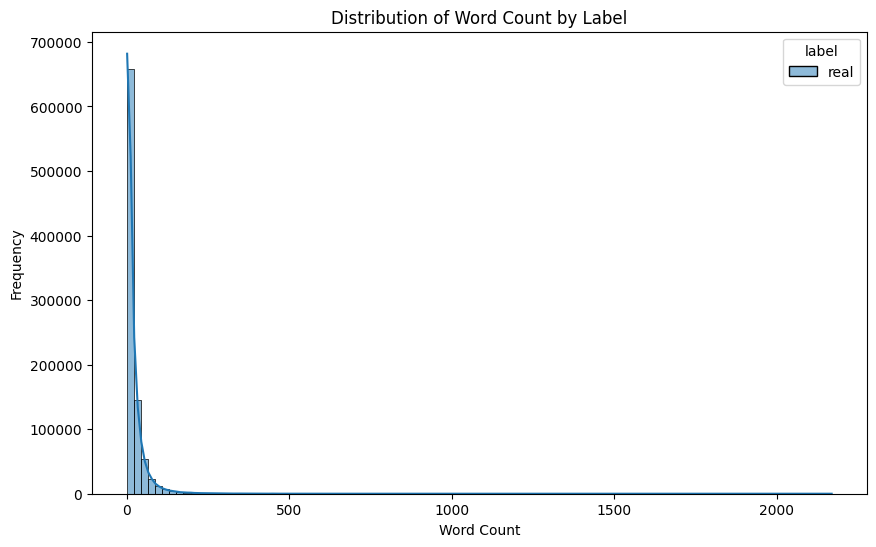

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_real, x='word_count', hue='label', kde=True, bins=100)
plt.title('Distribution of Word Count by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [6]:
data_gpt4 = pd.read_csv('Cleaned_Reviews_Categories.csv')

data_gpt4 = data_gpt4[data_gpt4['review_text'].apply(lambda x: isinstance(x, str))]
data_gpt4['word_count'] = data_gpt4['review_text'].apply(lambda x: len(x.split()))
data_gpt4.head()

,review_text,label,source,category,prompt_used,word_count
0,Este super tare. Foarte wow. Super super super.,fake,gpt,uscator de rufe,Genereaza un review fake foarte general pentru...,8
1,"Designul este magic, nu ma mai pot opri din pr...",fake,gpt,blender,Creeaza un review fake pentru un blender care ...,10
2,"Un produs de vis, mi-a schimbat viata in modur...",fake,gpt,masina de spalat,"Scrie un review fals, cu greseli gramaticale s...",10
3,"Il recomand tuturor, mai ales celor care nu il...",fake,gpt,laptop,Genereaza un review fake foarte general pentru...,10
4,"Produsul este incredibil de bun, l-am cumparat...",fake,gpt,telefon mobil,"Genereaza un review fals, suspicios de pozitiv...",11


In [7]:
categories = data_gpt4['category'].unique()
categories

array(['uscator de rufe', 'blender', 'masina de spalat', 'laptop',
       'telefon mobil', 'carte', 'televizor', 'husa de telefon',
       'casti audio', 'produs de baie'], dtype=object)

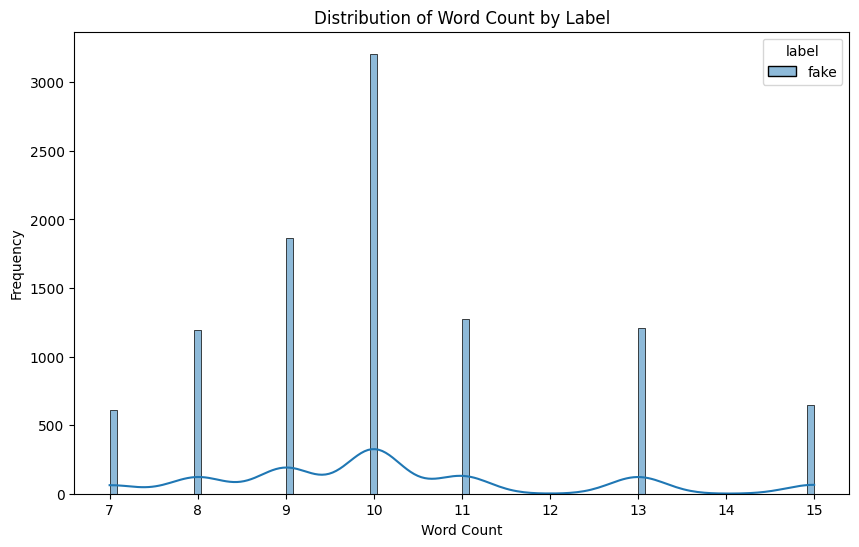

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_gpt4, x='word_count', hue='label', kde=True, bins=100)
plt.title('Distribution of Word Count by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [9]:
data_gpt2 = pd.read_csv('Final_eMAG_Fake_Reviews.csv')
data_gpt2 = data_gpt2[data_gpt2['GeneratedReview'].apply(lambda x: isinstance(x, str))]
#remove all text before the third period in the GeneratedReview column
data_gpt2['GeneratedReview'] = data_gpt2['GeneratedReview'].apply(lambda x: x.split('.', 3)[-1] if '.' in x else x)
data_gpt2['word_count'] = data_gpt2['GeneratedReview'].apply(lambda x: len(x.split()))
data_gpt2.head()

,GeneratedReview,label,source,category,Prompt,word_count
0,nu am ramas dezamagit. In momentul in care ai...,fake,generated with fine-tuned model,uscator de rufe,Am cumparat acest produs de pe eMAG si...,58
1,E foarte bun. Am fost foarte surprins. Sunt s...,fake,generated with fine-tuned model,blender,Am cumparat acest produs de pe eMAG si...,52
2,nici macar nu am apucat sa pun in functiune t...,fake,generated with fine-tuned model,masina de spalat,Am cumparat acest produs de pe eMAG si...,61
3,"Eu sunt foarte multumita de el, dar si de tel...",fake,generated with fine-tuned model,laptop,Am cumparat acest produs de pe eMAG si...,59
4,Sunt incntata de el! Pe lnga faptul ca este d...,fake,generated with fine-tuned model,telefon mobil,Am cumparat acest produs de pe eMAG si...,56


In [10]:
categories = data_gpt2['category'].unique()
categories

array(['uscator de rufe', 'blender', 'masina de spalat', 'laptop',
       'telefon mobil', 'carte', 'televizor', 'husa de telefon',
       'casti audio', 'produs de baie'], dtype=object)

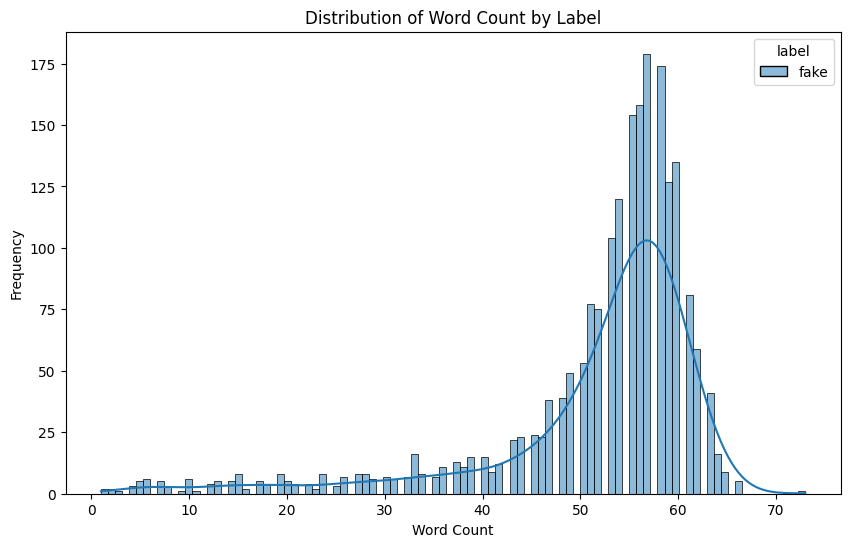

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_gpt2, x='word_count', hue='label', kde=True, bins=100)
plt.title('Distribution of Word Count by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

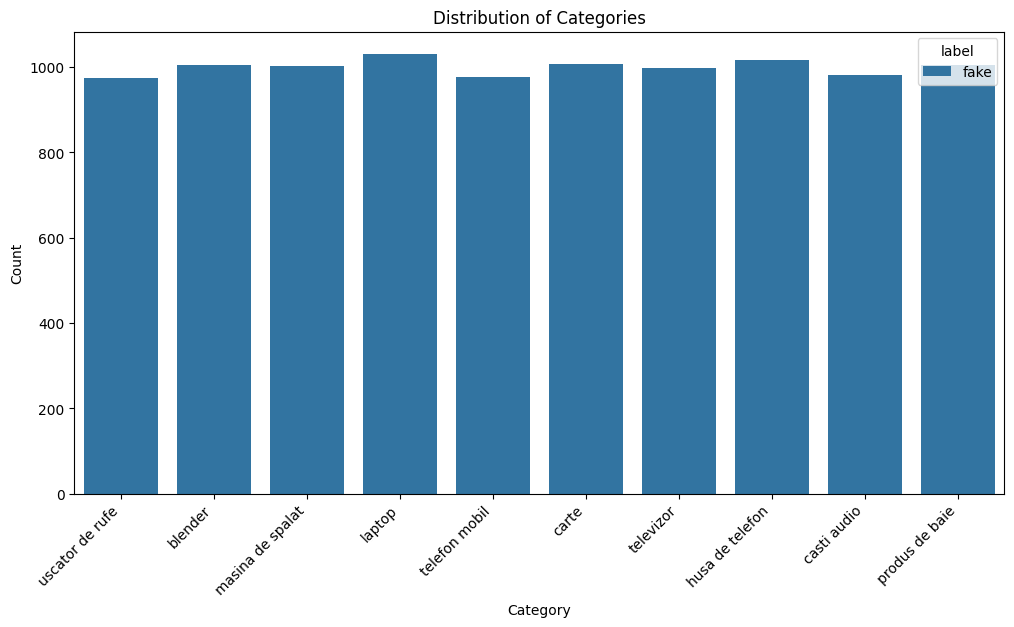

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_gpt4, x='category', hue='label')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

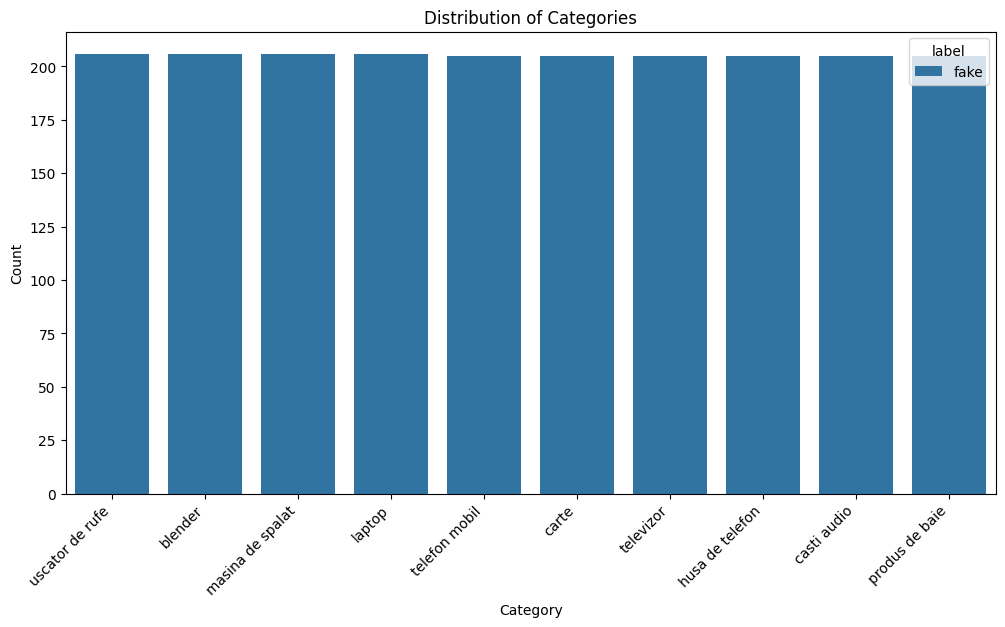

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_gpt2, x='category', hue='label')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

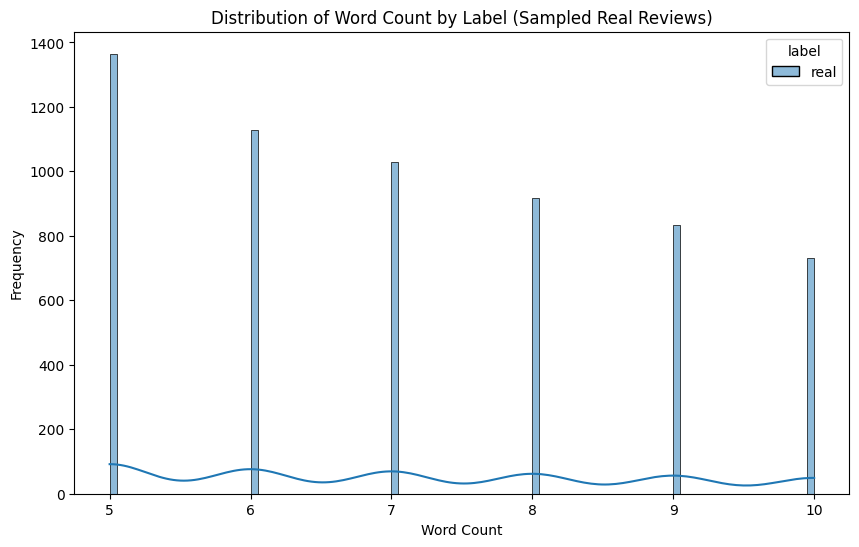

In [14]:
#samlpe 10000 entryes from data_real with word count between 5 and 20
data_real_sample1 = data_real[(data_real['word_count'] >= 5) & (data_real['word_count'] <= 10)].sample(n=6000, random_state=42)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_real_sample1, x='word_count', hue='label', kde=True, bins=100)
plt.title('Distribution of Word Count by Label (Sampled Real Reviews)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

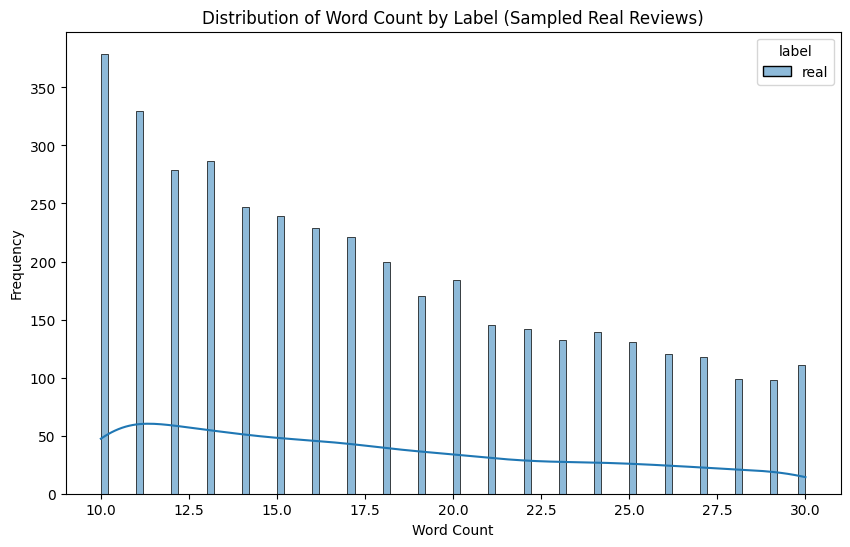

In [15]:
#samlpe 10000 entryes from data_real with word count between 5 and 20
data_real_sample4 = data_real[(data_real['word_count'] >= 10) & (data_real['word_count'] <= 30)].sample(n=4000, random_state=42)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_real_sample4, x='word_count', hue='label', kde=True, bins=100)
plt.title('Distribution of Word Count by Label (Sampled Real Reviews)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

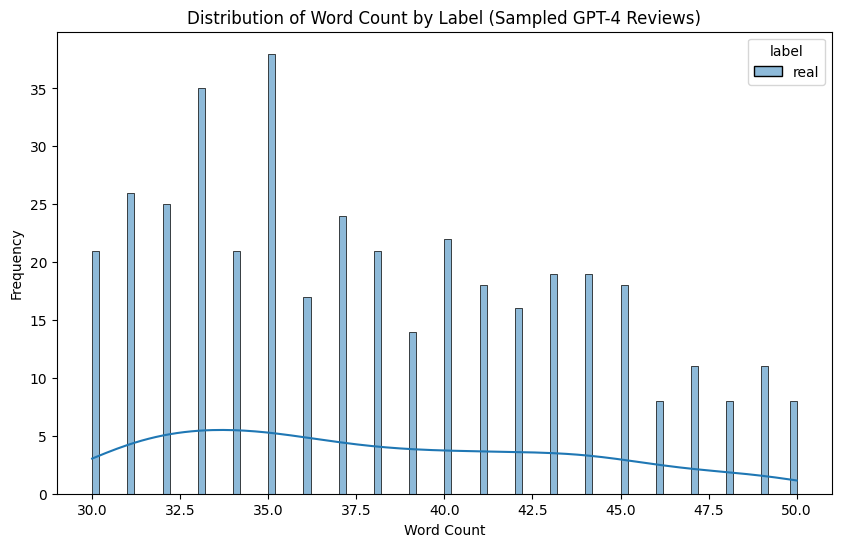

In [16]:
# Sample 2000 entries from data_gpt4 with word count between 5 and 20
data_real_sample2 = data_real[(data_real['word_count'] >= 30) & (data_real['word_count'] <= 50)].sample(n=400, random_state=42)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_real_sample2, x='word_count', hue='label', kde=True, bins=100)
plt.title('Distribution of Word Count by Label (Sampled GPT-4 Reviews)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

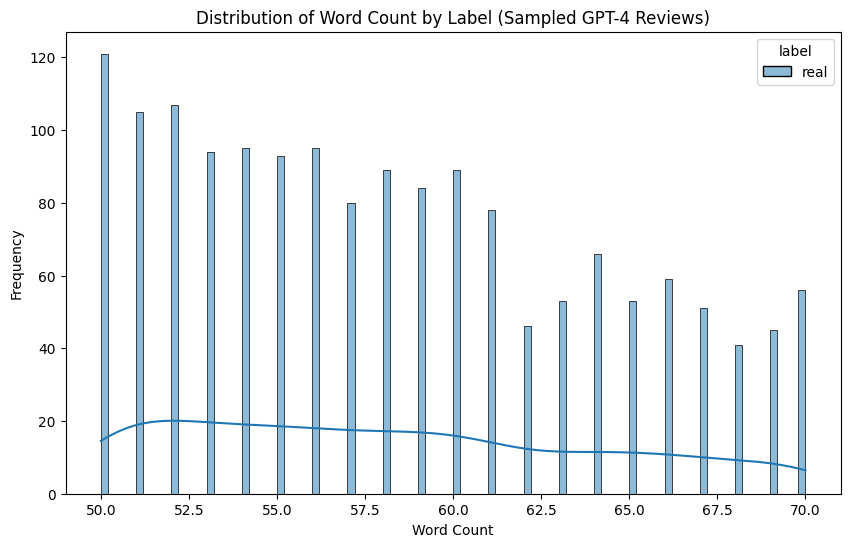

In [17]:
# Sample 2000 entries from data_gpt4 with word count between 5 and 20
data_real_sample3 = data_real[(data_real['word_count'] >= 50) & (data_real['word_count'] <= 70)].sample(n=1600, random_state=42)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_real_sample3, x='word_count', hue='label', kde=True, bins=100)
plt.title('Distribution of Word Count by Label (Sampled GPT-4 Reviews)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [18]:
data_real_sample = pd.concat([data_real_sample1, data_real_sample2, data_real_sample3, data_real_sample4], ignore_index=True)
print(data_real_sample.shape)


(12000, 5)


In [19]:
data_real_sample["label"] = "OR"
data_real_sample["text_"] = data_real_sample["review_text"]
data_real_sample.drop(columns=['review_text', 'source'], inplace=True)
data_real_sample.head()

,label,category,word_count,text_
0,OR,uscator de rufe,6,O placere sa gatesti cu tefal
1,OR,blender,7,Carte importanta privind istoria recenta a Rom...
2,OR,carte,8,De slaba calitate. Se blocheaza pe orice direc...
3,OR,blender,9,"Usor de asamblat, foarte ok raportat la pret, ..."
4,OR,uscator de rufe,5,Recomand pentru buget redus merita.


In [20]:
data_gpt2['label'] = "CG"
data_gpt2['text_'] = data_gpt2['GeneratedReview']
data_gpt2.drop(columns=['GeneratedReview', 'source', 'Prompt'], inplace=True)
data_gpt4['label'] = "CG"
data_gpt4['text_'] = data_gpt4['review_text']
data_gpt4.drop(columns=['review_text', 'source', 'prompt_used'], inplace=True)
data_gpt2.head()

,label,category,word_count,text_
0,CG,uscator de rufe,58,nu am ramas dezamagit. In momentul in care ai...
1,CG,blender,52,E foarte bun. Am fost foarte surprins. Sunt s...
2,CG,masina de spalat,61,nici macar nu am apucat sa pun in functiune t...
3,CG,laptop,59,"Eu sunt foarte multumita de el, dar si de tel..."
4,CG,telefon mobil,56,Sunt incntata de el! Pe lnga faptul ca este d...


In [21]:
data_gpt4.head()

,label,category,word_count,text_
0,CG,uscator de rufe,8,Este super tare. Foarte wow. Super super super.
1,CG,blender,10,"Designul este magic, nu ma mai pot opri din pr..."
2,CG,masina de spalat,10,"Un produs de vis, mi-a schimbat viata in modur..."
3,CG,laptop,10,"Il recomand tuturor, mai ales celor care nu il..."
4,CG,telefon mobil,11,"Produsul este incredibil de bun, l-am cumparat..."


In [22]:
romanian_fake_reviews_dataset = pd.concat([data_real_sample, data_gpt2, data_gpt4], ignore_index=True)
# scramble the dataset
romanian_fake_reviews_dataset = romanian_fake_reviews_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
data = romanian_fake_reviews_dataset.copy()
romanian_fake_reviews_dataset.head()

,label,category,word_count,text_
0,CG,casti audio,9,"Nu am apucat sa-l folosesc, dar sunt foarte mu..."
1,OR,telefon mobil,19,Bebe este maxim de incantat de tricicleta.Soli...
2,CG,blender,9,Foarte ieftin pentru cat de premium pare pe in...
3,OR,telefon mobil,11,"Un produs ok, calitate/pret ok. Se prezinta bi..."
4,CG,husa de telefon,57,"nu, nu e foarte mare. E de foarte mult folos...."


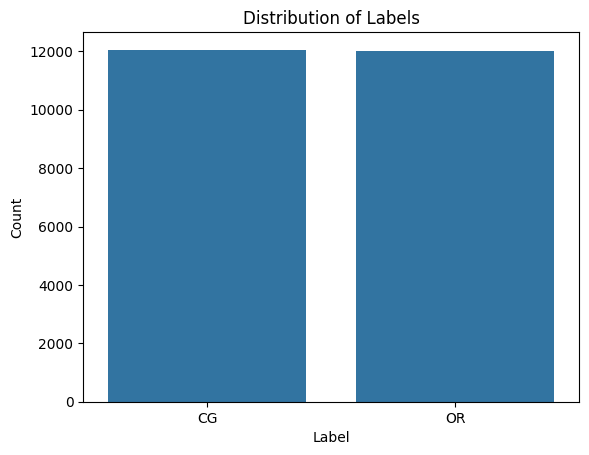

In [23]:
sns.countplot(data, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

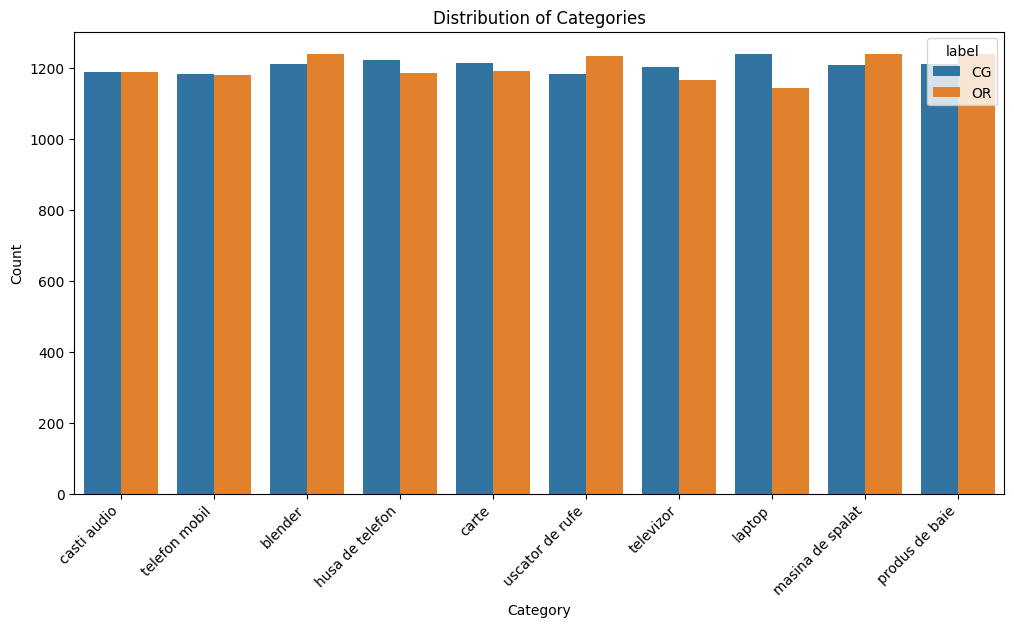

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='category', hue='label')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

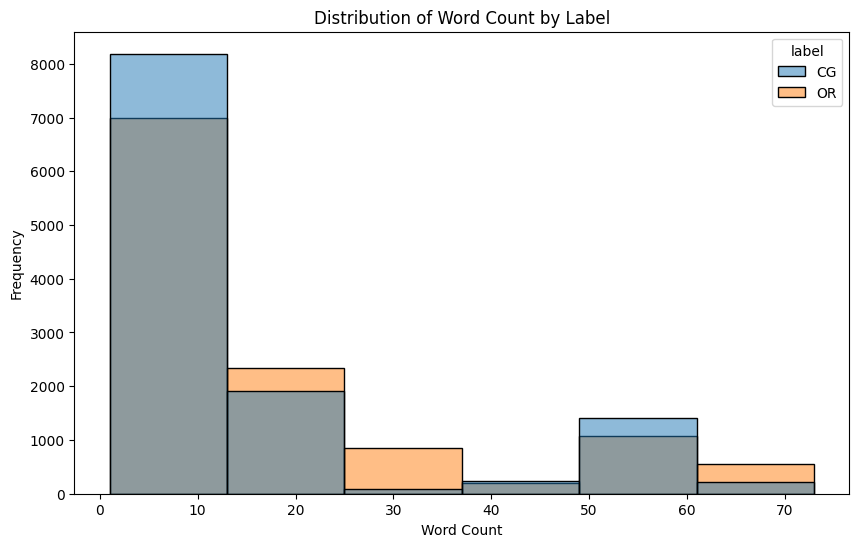

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='word_count', hue='label', bins=6)
plt.title('Distribution of Word Count by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [26]:
data.drop(columns=['word_count', 'category'], inplace=True)
data.head()

,label,text_
0,CG,"Nu am apucat sa-l folosesc, dar sunt foarte mu..."
1,OR,Bebe este maxim de incantat de tricicleta.Soli...
2,CG,Foarte ieftin pentru cat de premium pare pe in...
3,OR,"Un produs ok, calitate/pret ok. Se prezinta bi..."
4,CG,"nu, nu e foarte mare. E de foarte mult folos...."


In [27]:
data.to_csv('romanian_fake_reviews_dataset.csv', index=False)